In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df_weather = pd.read_csv(
    'weather_features.csv', 
    parse_dates=['dt_iso']
)

df_energy = pd.read_csv(
    'energy_dataset.csv', 
    parse_dates=['time']
)

In [3]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
# Drop the columns that only have 0´s and NaNs as they don´t have valid information.

df_energy = df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], 
                            axis=1)

In [5]:
df_energy.describe().round(2)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35045.00,35046.00,35046.00,35046.00,35045.00,35045.00,35045.00,35046.00,35047.00,35046.00,35046.00,35046.00,35045.00,35046.00,35028.00,35064.00,35064.00
mean,383.51,448.06,5622.74,4256.07,298.32,475.58,972.12,2605.11,6263.91,60.23,85.64,1432.67,269.45,5464.48,28696.94,49.87,57.88
std,85.35,354.57,2201.83,1961.60,52.52,792.41,400.78,1835.20,839.67,20.24,14.08,1680.12,50.20,3213.69,4574.99,14.62,14.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18041.00,2.06,9.33
25%,333.00,0.00,4126.00,2527.00,263.00,0.00,637.00,1077.25,5760.00,53.00,73.00,71.00,240.00,2933.00,24807.75,41.49,49.35
50%,367.00,509.00,4969.00,4474.00,300.00,68.00,906.00,2164.00,6566.00,57.00,88.00,616.00,279.00,4849.00,28901.00,50.52,58.02
75%,433.00,757.00,6429.00,5838.75,330.00,616.00,1250.00,3757.00,7025.00,80.00,97.00,2578.00,310.00,7398.00,32192.00,60.53,68.01
max,592.00,999.00,20034.00,8359.00,449.00,4523.00,2000.00,9728.00,7117.00,106.00,119.00,5792.00,357.00,17436.00,41015.00,101.99,116.80


In [6]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [7]:
# Convert time to datetime object and set it as index

df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
df_energy = df_energy.set_index('time')

C:\Users\gpere\AppData\Local\Temp\ipykernel_22164\3545329246.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)


In [8]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

temp_energy = df_energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [9]:
df_energy.isnull().sum(axis=0)

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [10]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

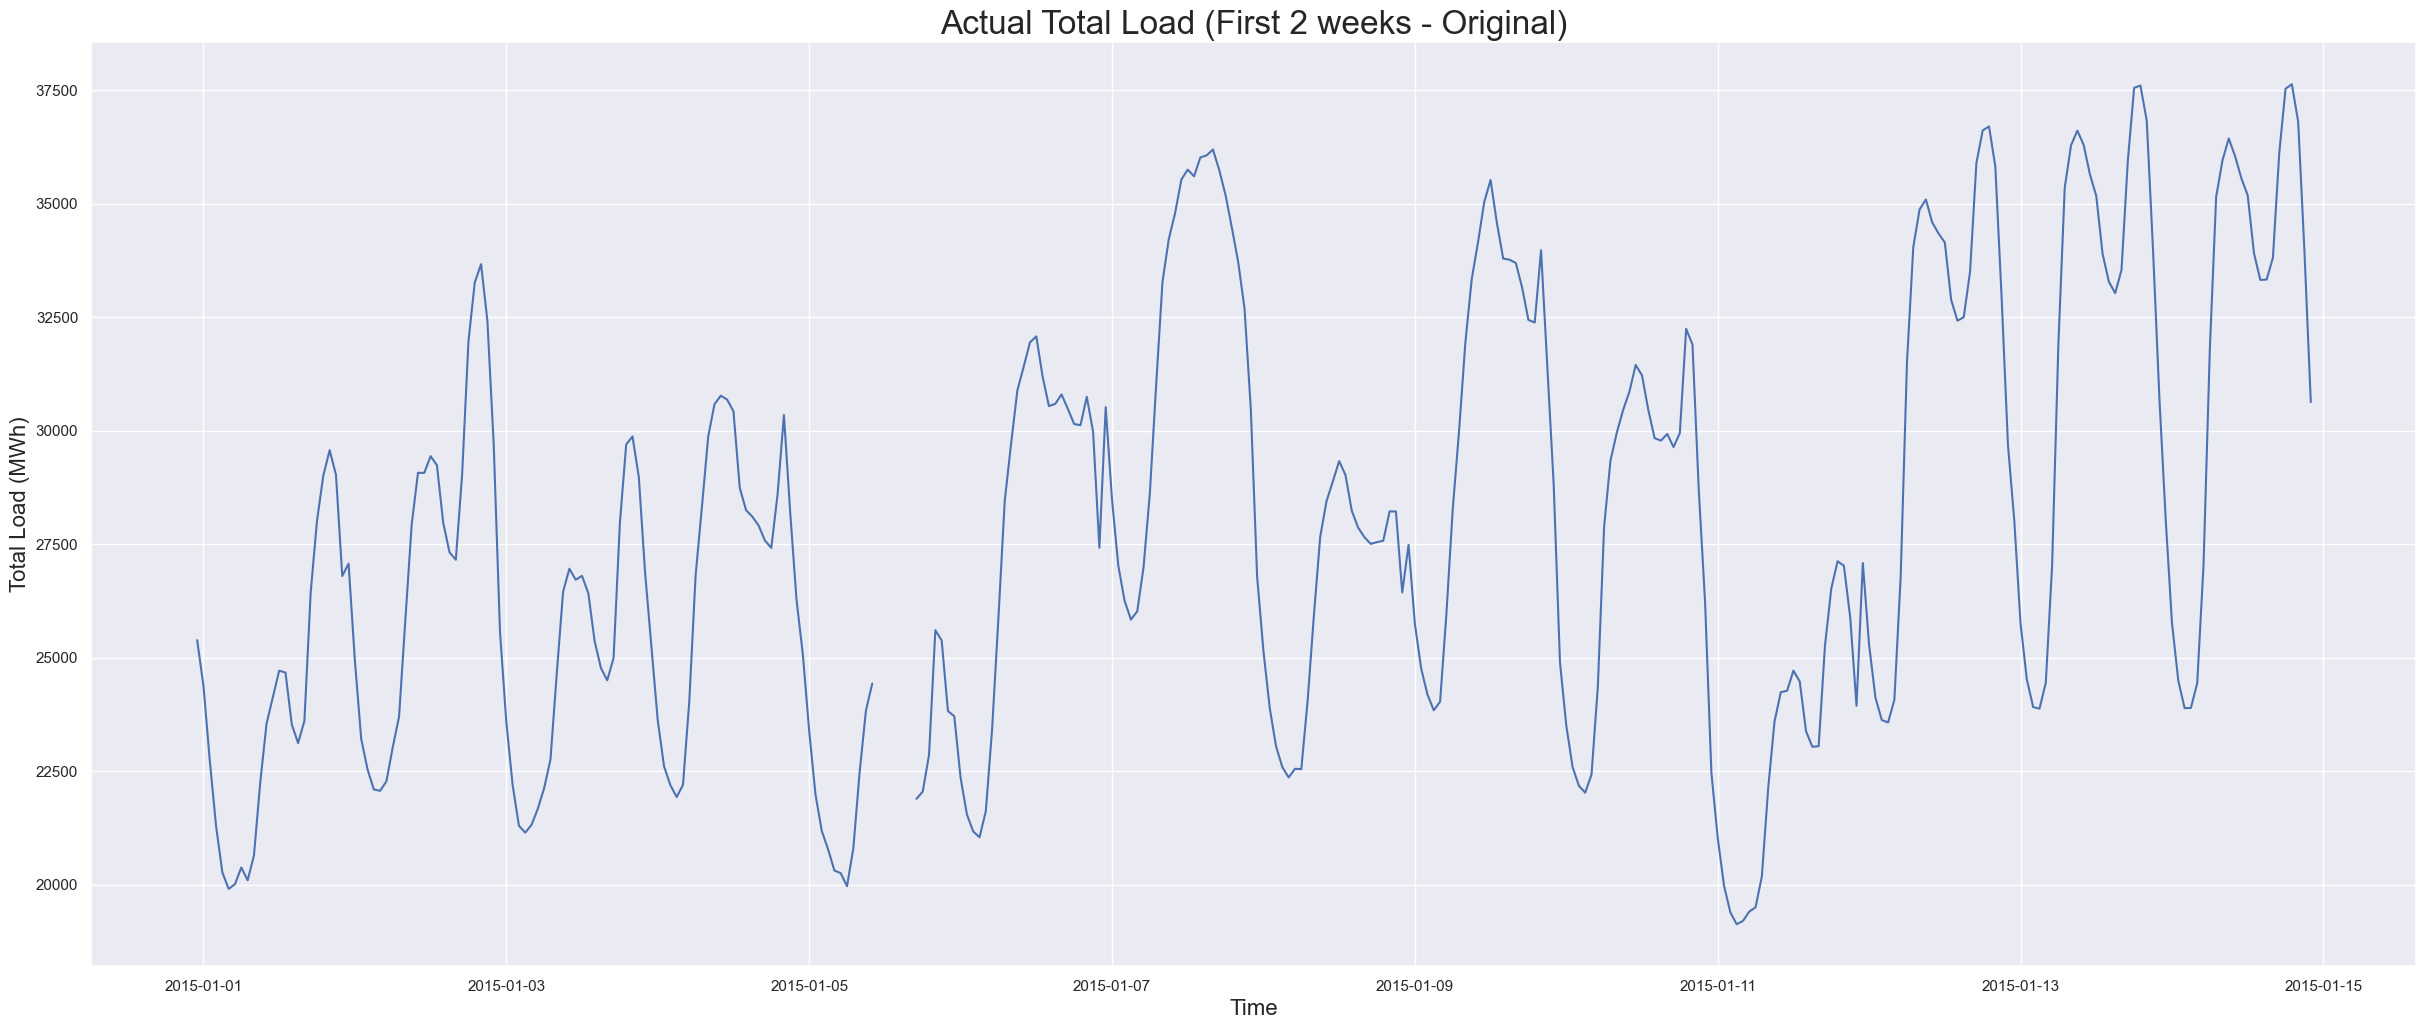

In [11]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=df_energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [12]:
# Display the rows with null values

df_energy[df_energy.isnull().any(axis=1)].tail()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2016-11-23 03:00:00+00:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,43.19,49.11
2017-11-14 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,60.53,66.17
2017-11-14 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,68.05,75.45
2018-06-11 16:00:00+00:00,331.0,506.0,7538.0,5360.0,300.0,1.0,1134.0,4258.0,5856.0,52.0,96.0,170.0,269.0,9165.0,NaN,69.87,64.93
2018-07-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.01,69.79


In [13]:
# Fill null values using interpolation

df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [14]:
import matplotlib.pyplot as plt

# Use a short time slice to make the plot readable
#series = df_energy['total load actual'].copy()
#sample = series['2017-01-01':'2017-01-03']

# Interpolations
#linear = sample.interpolate(method='linear')
#polynomial = sample.interpolate(method='polynomial', order=2)
#spline = sample.interpolate(method='spline', order=2)

# Plot all
#plt.figure(figsize=(14, 6))
#plt.plot(sample, label='Original (with NaNs)', marker='o')
#plt.plot(linear, label='Linear', linestyle='--')
#plt.plot(polynomial, label='Polynomial (order=2)', linestyle='-.')
#plt.plot(spline, label='Spline (order=2)', linestyle=':')
##plt.title('Interpolation Methods Comparison for "total load actual"')
#plt.xlabel('Time')
#plt.ylabel('Total Load (MWh)')
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()

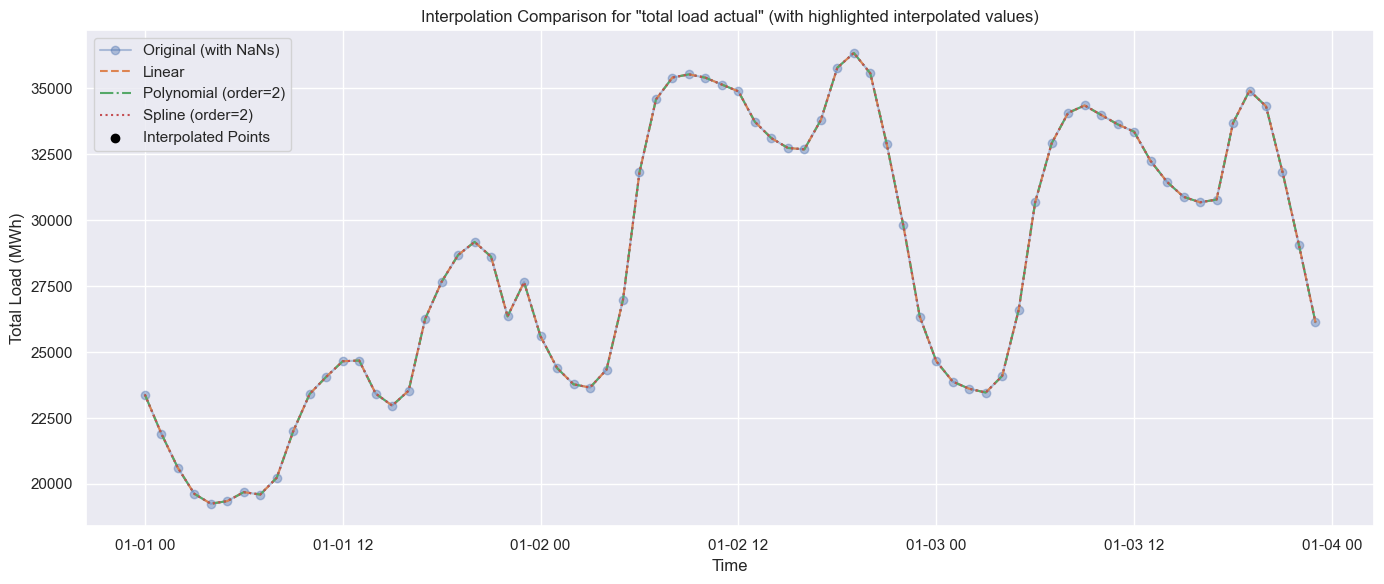

In [15]:
# Extract a window of data with known missing values
series = df_energy['total load actual'].copy()
sample = series['2017-01-01':'2017-01-03']
nan_mask = sample.isna()

# Perform interpolations
linear = sample.interpolate(method='linear')
polynomial = sample.interpolate(method='polynomial', order=2)
spline = sample.interpolate(method='spline', order=2)

# Plot with missing points clearly visible
plt.figure(figsize=(14, 6))
plt.plot(sample.index, sample.values, 'o-', label='Original (with NaNs)', alpha=0.4)
plt.plot(linear.index, linear.values, '--', label='Linear')
plt.plot(polynomial.index, polynomial.values, '-.', label='Polynomial (order=2)')
plt.plot(spline.index, spline.values, ':', label='Spline (order=2)')

# Highlight interpolated points (where original was NaN)
plt.scatter(sample.index[nan_mask], linear[nan_mask], label='Interpolated Points', color='black', zorder=5)

plt.title('Interpolation Comparison for "total load actual" (with highlighted interpolated values)')
plt.xlabel('Time')
plt.ylabel('Total Load (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', df_energy.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


# Weather features dataset

In [17]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [18]:
df_weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [19]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [20]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [21]:
# Convert columns with int64 type values to float64 type

df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

In [22]:
# Convert dt_iso to datetime type, rename it and set it as index

df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather = df_weather.drop(['dt_iso'], axis=1)
df_weather = df_weather.set_index('time')

C:\Users\gpere\AppData\Local\Temp\ipykernel_22164\2189753010.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)


In [23]:
# Find NaNs and duplicates in df_weather

print('There are {} missing values or NaNs in df_weather.'
      .format(df_weather.isnull().values.sum()))

temp_weather = df_weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 8622 duplicate rows in df_weather based on all columns.


In [24]:
# Display the number of rows in each dataframe

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

cities = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.


In [25]:
# Create df_weather_2 and drop duplicate rows in df_weather

df_weather_2 = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], 
                                                        keep='last').set_index('time')

df_weather = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [26]:
# Display the number of rows in each dataframe again

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

grouped_weather = df_weather.groupby('city_name')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.


In [27]:
# Display all the unique values in the column 'weather_description'

weather_description_unique = df_weather['weather_description'].unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

In [28]:
# Display all the unique values in the column 'weather_main'

weather_main_unique = df_weather['weather_main'].unique()
weather_main_unique

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust', 'squall'], dtype=object)

In [29]:
# Display all the unique values in the column 'weather_id'

weather_id_unique = df_weather['weather_id'].unique()
weather_id_unique

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 211., 520., 300., 201., 741., 711., 301., 302.,
       721., 600., 616., 615., 601., 611., 311., 310., 620., 531., 602.,
       731., 761., 210., 771.])

In [30]:
# Define a function which will calculate R-squared score for the same column in two dataframes

def encode_and_display_r2_score(df_1, df_2, column, categorical=False):
    dfs = [df_1, df_2]
    if categorical:
        for df in dfs:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    r2 = r2_score(df_1[column], df_2[column])
    print("R-Squared score of {} is {}".format(column, r2.round(3)))

In [31]:
# Drop columns with qualitative weather information
df_weather = df_weather.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)

In [32]:
# Display the number of duplicates in df_weather

temp_weather = df_weather.reset_index().duplicated(subset=['time', 'city_name'], 
                                                   keep='first').sum()
print('There are {} duplicate rows in df_weather ' \
      'based on all columns except "time" and "city_name".'.format(temp_weather))

There are 0 duplicate rows in df_weather based on all columns except "time" and "city_name".


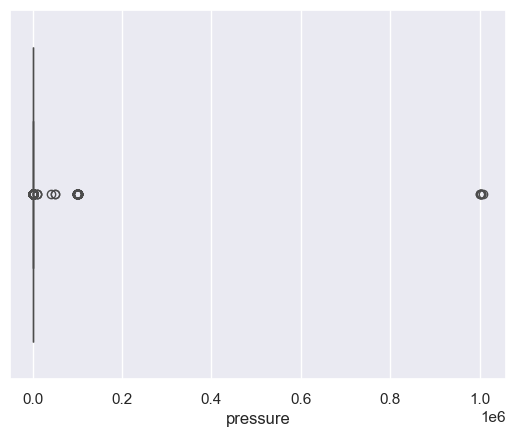

In [33]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

In [34]:
# Replace outliers in 'pressure' with NaNs

df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

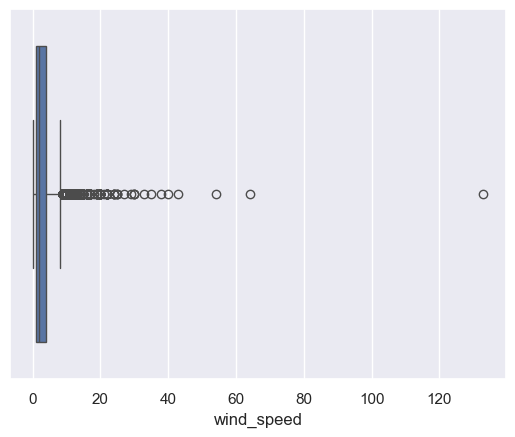

In [35]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

In [36]:
# Replace outliers in 'wind_speed' with NaNs

df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan

In [37]:
# Fill null values using interpolation

df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

C:\Users\gpere\AppData\Local\Temp\ipykernel_22164\3371874962.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


In [38]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [39]:
# Merge all dataframes into the final dataframe

df_final = df_energy

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'rain_3h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bilbao', 'clo

In [40]:
# Display the number of NaNs and duplicates in the final dataframe

print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


In [41]:
df_final.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0


In [42]:
df_final.reset_index(inplace=True)
df_final.to_csv('dataset.csv', index=False)

In [43]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 73 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

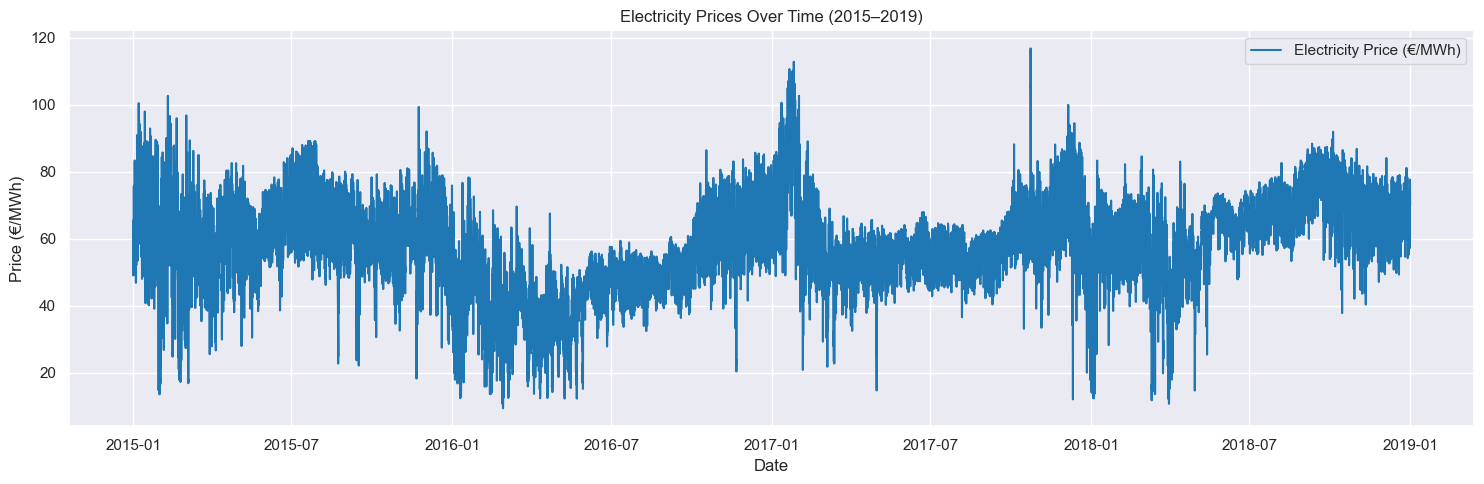

In [44]:
# Make sure time is the index and datetime type
df_final['time'] = pd.to_datetime(df_final['time'])
df_final.set_index('time', inplace=True)

# Plot electricity price over time
plt.figure(figsize=(15, 5))
plt.plot(df_final.index, df_final['price actual'], color='tab:blue', label='Electricity Price (€/MWh)')
plt.title('Electricity Prices Over Time (2015–2019)')
plt.xlabel('Date')
plt.ylabel('Price (€/MWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gpere\AppData\Local\Temp\ipykernel_22164\2015689538.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_gen = df_final[generation_cols].fillna(0).resample('M').mean()


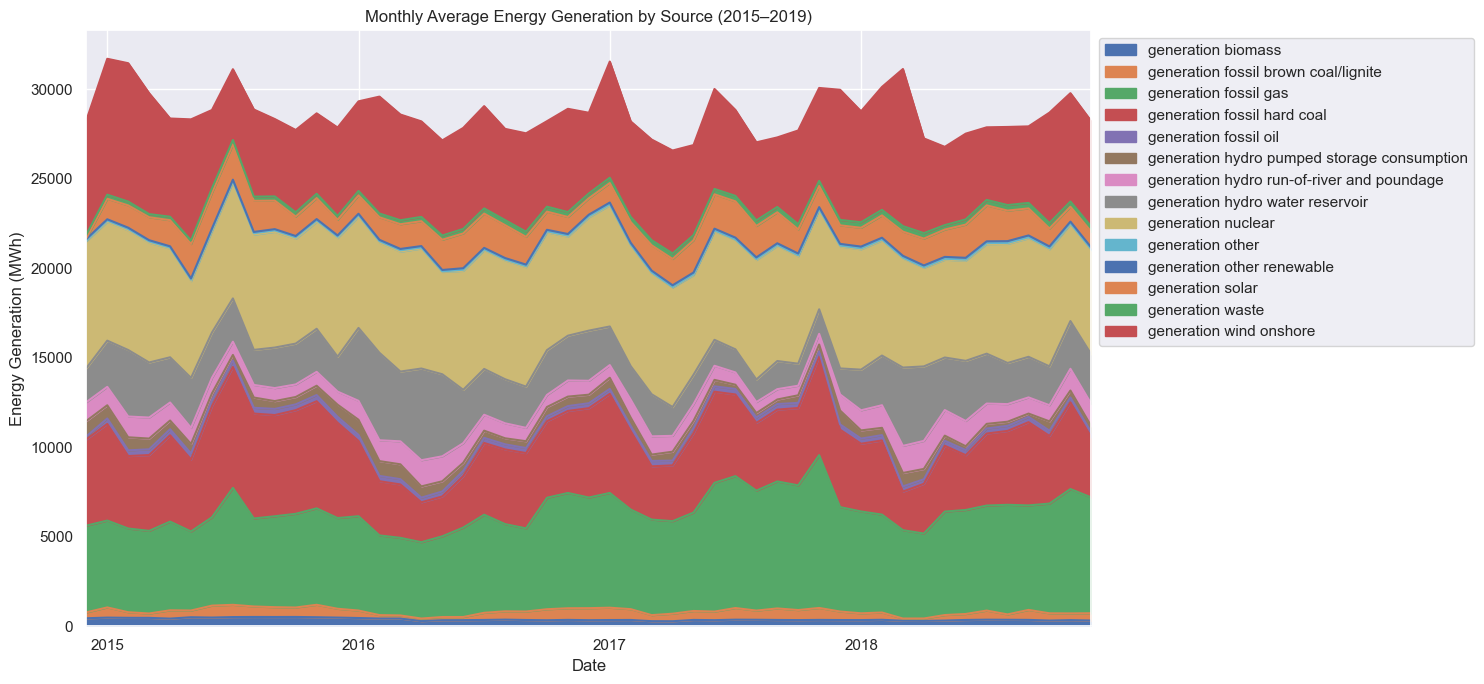

In [45]:
# Select generation columns (excluding forecast or irrelevant ones)
generation_cols = [col for col in df_final.columns if col.startswith('generation') and 'actual' not in col]

# Resample monthly and plot area chart
monthly_gen = df_final[generation_cols].fillna(0).resample('M').mean()

monthly_gen.plot.area(figsize=(15, 7), stacked=True)
plt.title('Monthly Average Energy Generation by Source (2015–2019)')
plt.xlabel('Date')
plt.ylabel('Energy Generation (MWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

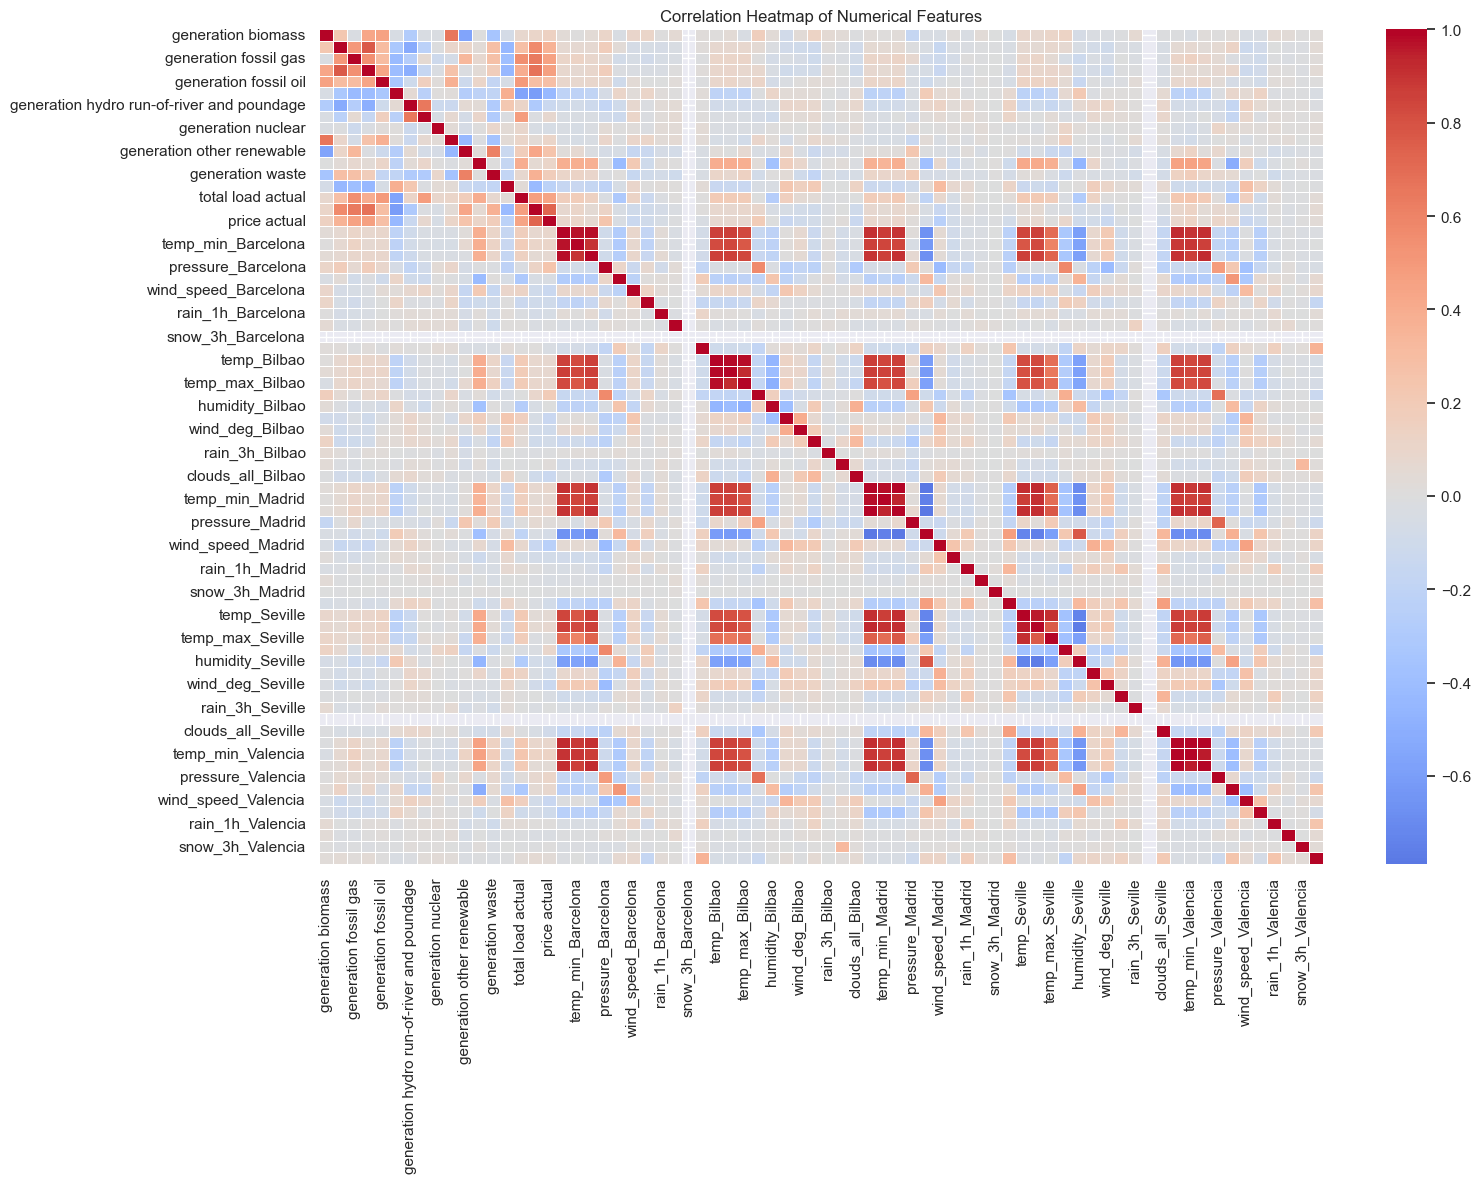

In [46]:
# Select only numeric columns (correlation doesn't work with strings or datetimes)
numeric_df = df_final.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

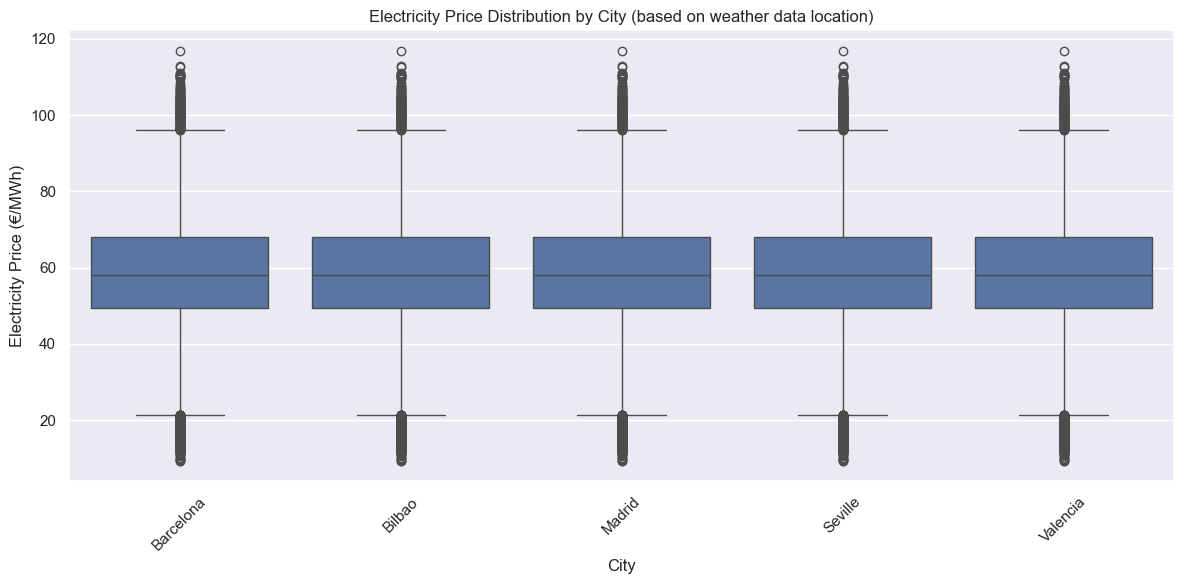

In [47]:
# Use the correct temperature columns as proxies for cities
city_temp_cols = [col for col in df_final.columns if col.startswith('temp_') and not col.startswith('temp_min') and not col.startswith('temp_max')]

# Melt the dataset: one row per (price, city) combination
melted = pd.melt(
    df_final[city_temp_cols + ['price actual']],
    id_vars='price actual',
    var_name='City',
    value_name='Temperature'
)

# Extract city names from column names
melted['City'] = melted['City'].str.replace('temp_', '')

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x='City', y='price actual')
plt.title('Electricity Price Distribution by City (based on weather data location)')
plt.xlabel('City')
plt.ylabel('Electricity Price (€/MWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

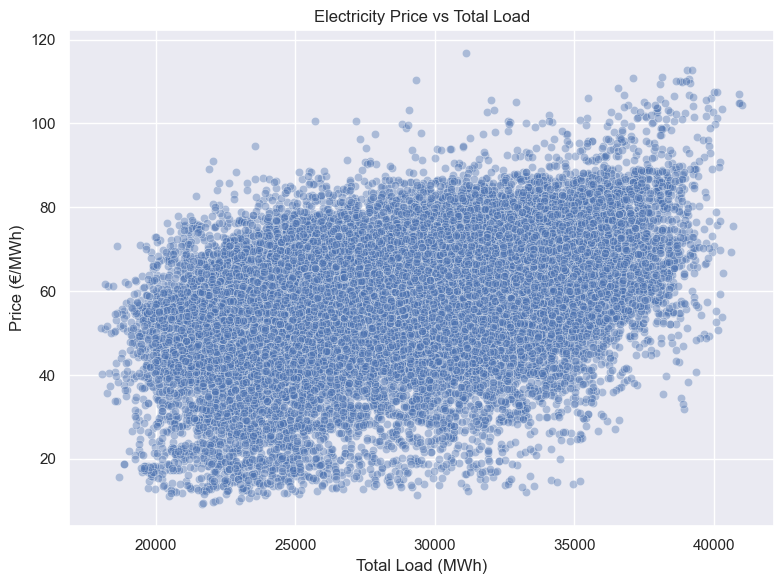

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of total load vs electricity price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x='total load actual', y='price actual', alpha=0.4)
plt.title('Electricity Price vs Total Load')
plt.xlabel('Total Load (MWh)')
plt.ylabel('Price (€/MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


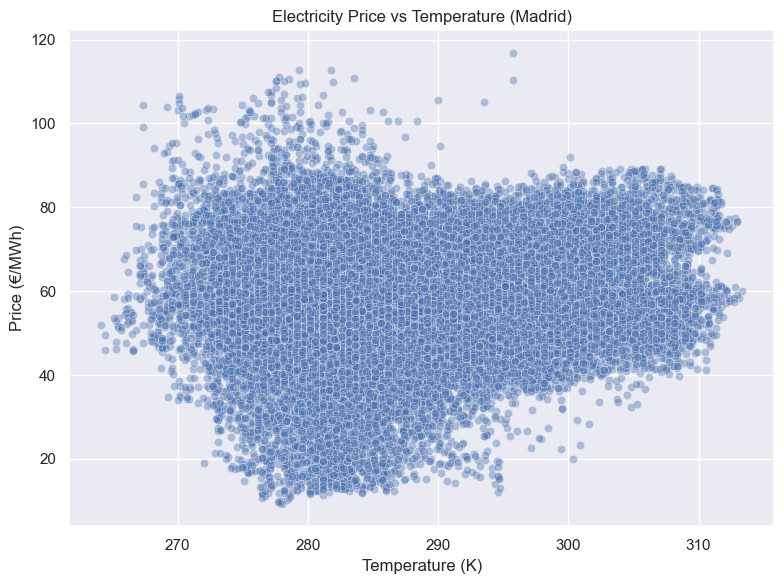

In [49]:
# Scatter plot of temperature in Madrid vs electricity price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final, x='temp_Madrid', y='price actual', alpha=0.4)
plt.title('Electricity Price vs Temperature (Madrid)')
plt.xlabel('Temperature (K)')
plt.ylabel('Price (€/MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

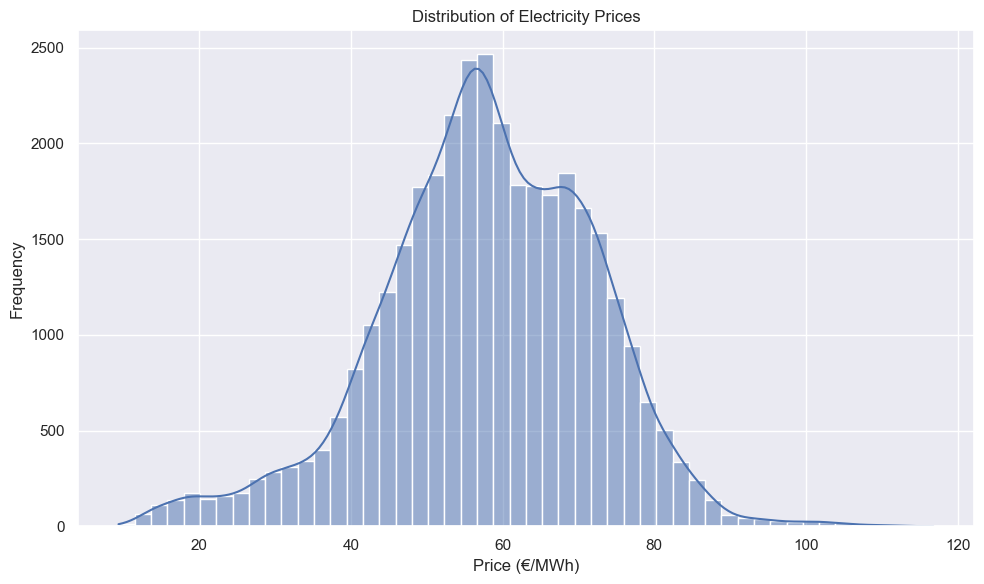

In [50]:
# Plot histogram + density for electricity prices
plt.figure(figsize=(10, 6))
sns.histplot(df_final['price actual'], bins=50, kde=True)
plt.title('Distribution of Electricity Prices')
plt.xlabel('Price (€/MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

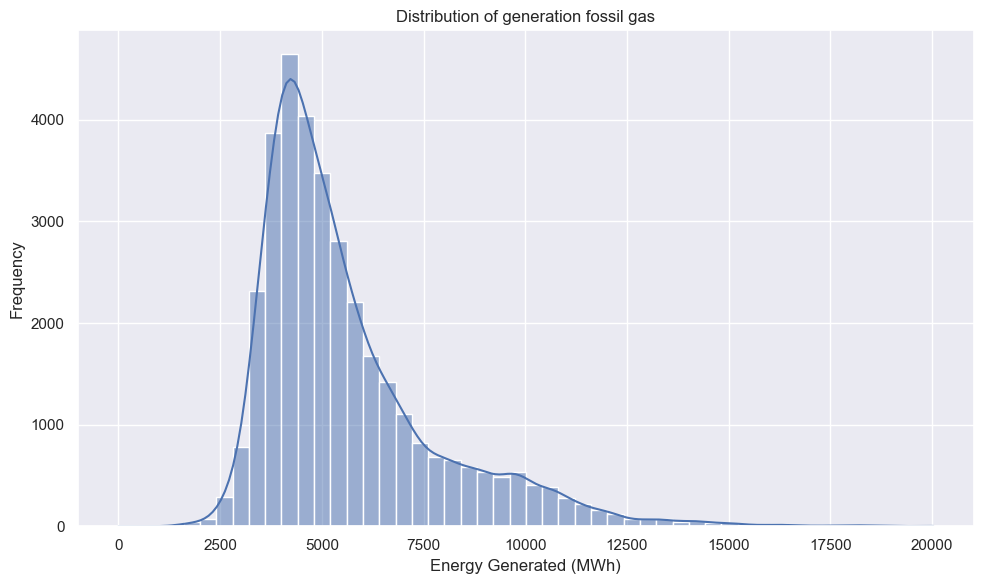

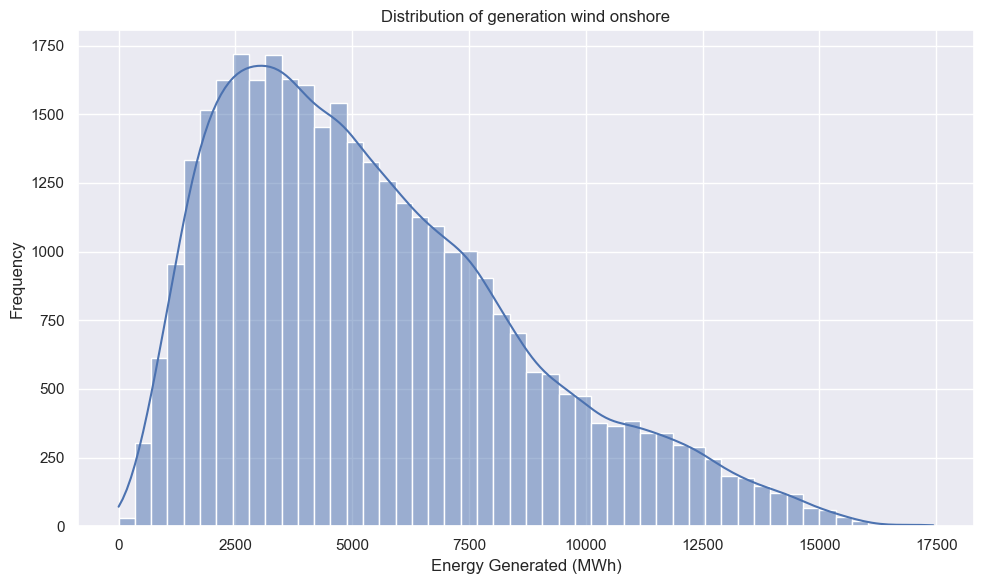

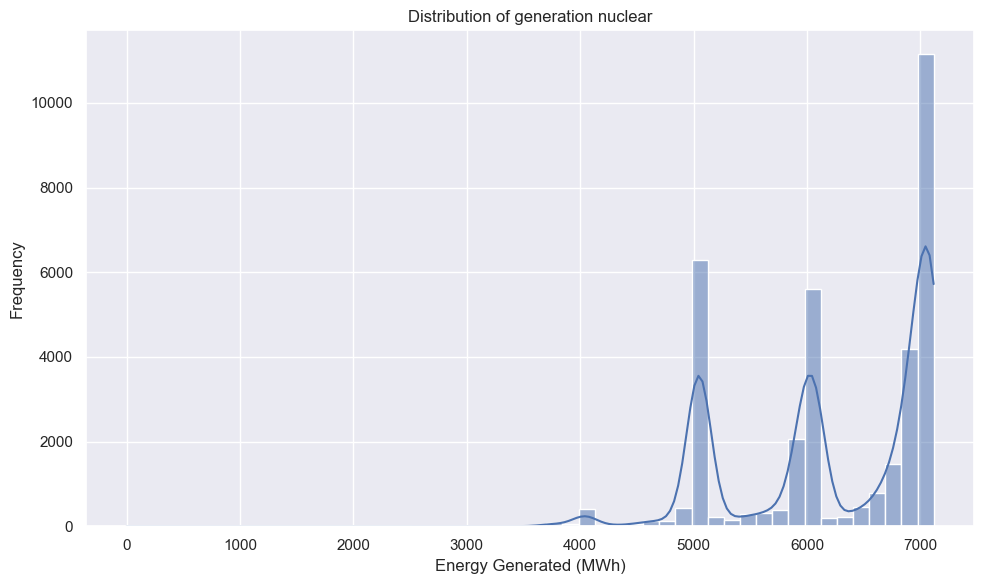

In [51]:
generation_cols = [
    'generation fossil gas',
    'generation wind onshore',
    'generation nuclear'
]

# Plot each in its own histogram
for col in generation_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_final[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Energy Generated (MWh)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

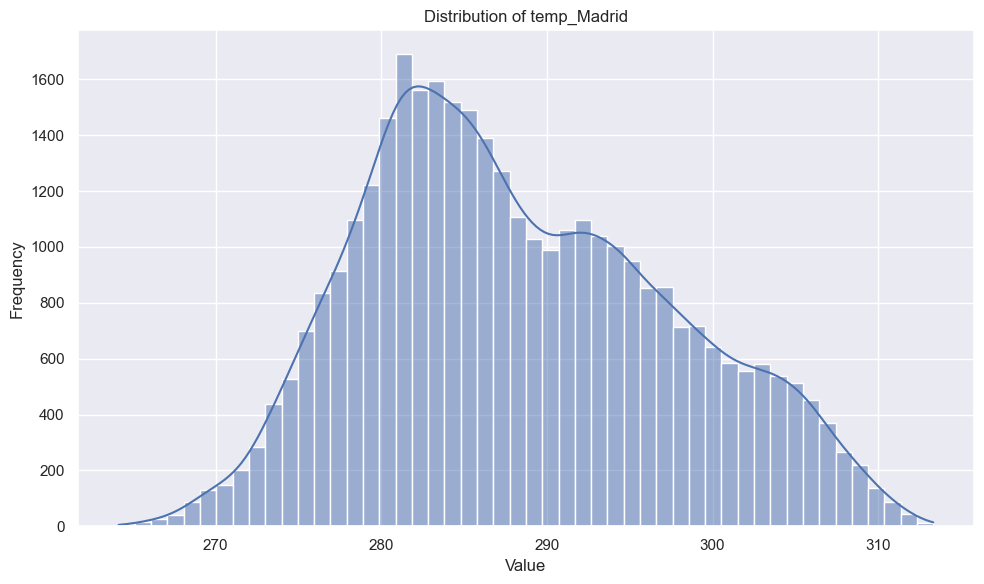

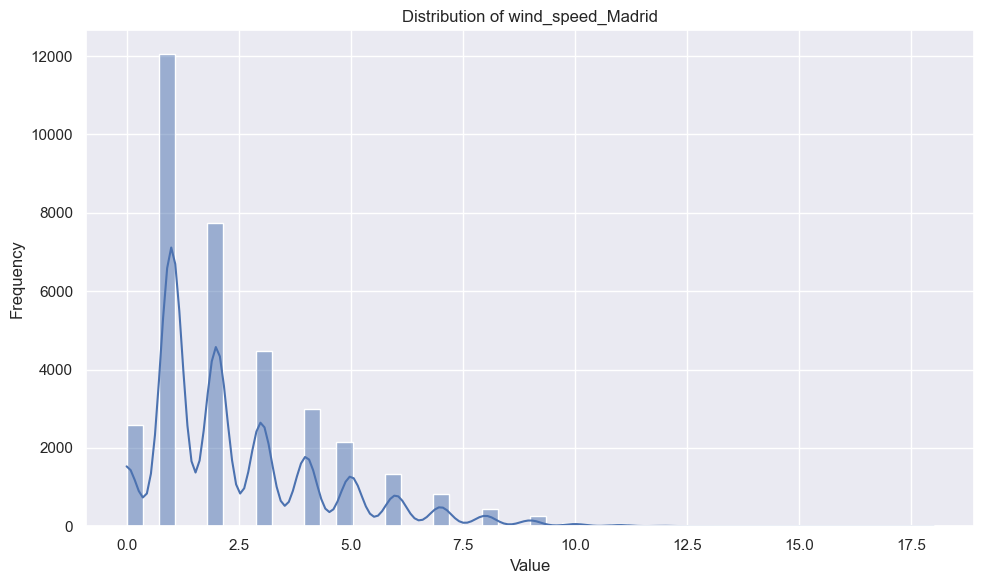

In [52]:
weather_cols = ['temp_Madrid', 'wind_speed_Madrid']

# Plot each weather variable
for col in weather_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_final[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [53]:
# Use the correct DataFrame if it’s already loaded
try:
    df = df_final  # if you're using df_final instead of df
except NameError:
    pass  # fallback to 'df' if df_final doesn't exist

# Check if 'time' is already the index
if 'time' not in df.columns and df.index.name == 'time':
    print("✅ 'time' is already set as the index.")
else:
    df['time'] = pd.to_datetime(df['time'])
    df = df.set_index('time')

# Define features and target
X = df.drop(columns=['price actual', 'price day ahead'], errors='ignore')  # ignore if already missing
y = df['price actual']

# Split data chronologically: 80% train, 20% test
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train baseline model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Baseline Linear Regression - MAE: {mae:.2f} €/MWh, RMSE: {rmse:.2f} €/MWh")


✅ 'time' is already set as the index.
📊 Baseline Linear Regression - MAE: 11.31 €/MWh, RMSE: 13.22 €/MWh


In [54]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"🌲 Random Forest - MAE: {rf_mae:.2f} €/MWh, RMSE: {rf_rmse:.2f} €/MWh")


🌲 Random Forest - MAE: 11.96 €/MWh, RMSE: 14.05 €/MWh


In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print(f"⚡ XGBoost - MAE: {xgb_mae:.2f} €/MWh, RMSE: {xgb_rmse:.2f} €/MWh")


⚡ XGBoost - MAE: 11.30 €/MWh, RMSE: 13.30 €/MWh


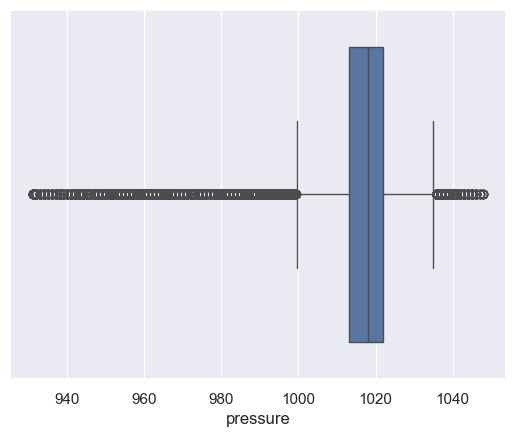

In [56]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

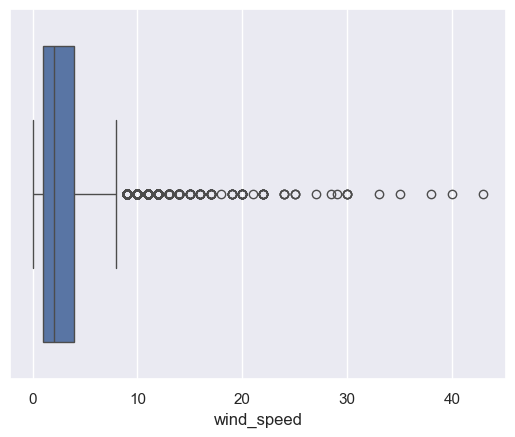

In [57]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

🧪 Running Linear Regression over 5 sliding windows...
🔍 Window 1 example:
   Actual: 71.80 €/MWh | Predicted: 74.87 €/MWh
   Actual: 73.93 €/MWh | Predicted: 82.25 €/MWh
   Actual: 74.27 €/MWh | Predicted: 82.03 €/MWh
   Actual: 74.58 €/MWh | Predicted: 79.15 €/MWh
   Actual: 74.57 €/MWh | Predicted: 79.11 €/MWh


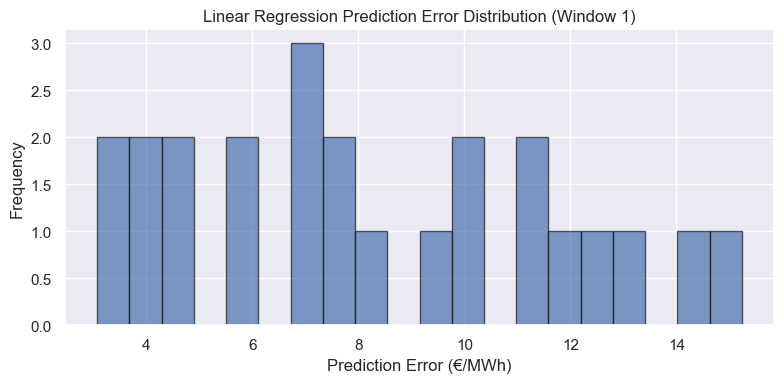


📊 Linear Regression — Average % Error over 5 windows: 22.00%


np.float64(21.997354967358298)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def evaluate_sliding_window_lr(df, target_col='price actual', forecast_horizon=24, n_windows=5):
    df = df.copy()
    df['price_actual_24h_ahead'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['price_actual_24h_ahead'])

    # Remove target and forecast-related columns
    drop_cols = ['price actual', 'price day ahead', 'price_actual_24h_ahead']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X = df[feature_cols]
    y = df['price_actual_24h_ahead']

    print(f"🧪 Running Linear Regression over {n_windows} sliding windows...")

    window_size = len(df) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_test = X.iloc[test_start:test_end]
        y_test = y.iloc[test_start:test_end]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test.values[:5], y_pred[:5]):
                print(f"   Actual: {true:.2f} €/MWh | Predicted: {pred:.2f} €/MWh")

            import matplotlib.pyplot as plt
            error_dist = y_pred - y_test.values

            plt.figure(figsize=(8, 4))
            plt.hist(error_dist, bins=20, edgecolor='k', alpha=0.7)
            plt.title("Linear Regression Prediction Error Distribution (Window 1)")
            plt.xlabel("Prediction Error (€/MWh)")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        err_pct = mean_absolute_percentage_error(y_test, y_pred) * 100
        errors.append(err_pct)

    if errors:
        avg_error_pct = np.mean(errors)
        print(f"\n📊 Linear Regression — Average % Error over {len(errors)} windows: {avg_error_pct:.2f}%")
        return avg_error_pct
    else:
        print("❌ No valid windows to evaluate.")
        return None

 
evaluate_sliding_window_lr(df)


🧪 Running Random Forest over 5 sliding windows...
🔍 Window 1 example:
   Actual: 71.80 €/MWh | Predicted: 70.95 €/MWh
   Actual: 73.93 €/MWh | Predicted: 72.70 €/MWh
   Actual: 74.27 €/MWh | Predicted: 72.84 €/MWh
   Actual: 74.58 €/MWh | Predicted: 68.74 €/MWh
   Actual: 74.57 €/MWh | Predicted: 67.29 €/MWh


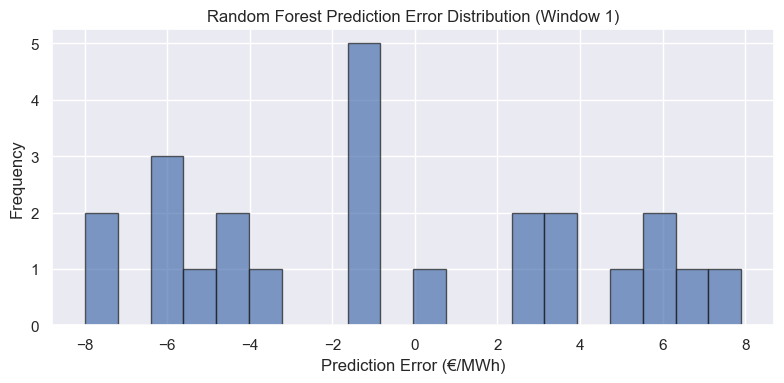


📊 Random Forest — Average % Error over 5 windows: 12.84%


np.float64(12.839870131208182)

In [59]:
from sklearn.ensemble import RandomForestRegressor

def evaluate_sliding_window_rf(df, target_col='price actual', forecast_horizon=24, n_windows=5):
    df = df.copy()
    df['price_actual_24h_ahead'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['price_actual_24h_ahead'])

    drop_cols = ['price actual', 'price day ahead', 'price_actual_24h_ahead']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X = df[feature_cols]
    y = df['price_actual_24h_ahead']

    print(f"🧪 Running Random Forest over {n_windows} sliding windows...")

    window_size = len(df) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_test = X.iloc[test_start:test_end]
        y_test = y.iloc[test_start:test_end]

        model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test.values[:5], y_pred[:5]):
                print(f"   Actual: {true:.2f} €/MWh | Predicted: {pred:.2f} €/MWh")

            import matplotlib.pyplot as plt
            error_dist = y_pred - y_test.values

            plt.figure(figsize=(8, 4))
            plt.hist(error_dist, bins=20, edgecolor='k', alpha=0.7)
            plt.title("Random Forest Prediction Error Distribution (Window 1)")
            plt.xlabel("Prediction Error (€/MWh)")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        err_pct = mean_absolute_percentage_error(y_test, y_pred) * 100
        errors.append(err_pct)

    if errors:
        avg_error_pct = np.mean(errors)
        print(f"\n📊 Random Forest — Average % Error over {len(errors)} windows: {avg_error_pct:.2f}%")
        return avg_error_pct
    else:
        print("❌ No valid windows to evaluate.")
        return None
    
evaluate_sliding_window_rf(df)


🧪 Running XGBoost over 5 sliding windows...
🔍 Window 1 example:
   Actual: 71.80 €/MWh | Predicted: 72.13 €/MWh
   Actual: 73.93 €/MWh | Predicted: 72.33 €/MWh
   Actual: 74.27 €/MWh | Predicted: 71.93 €/MWh
   Actual: 74.58 €/MWh | Predicted: 67.06 €/MWh
   Actual: 74.57 €/MWh | Predicted: 62.89 €/MWh


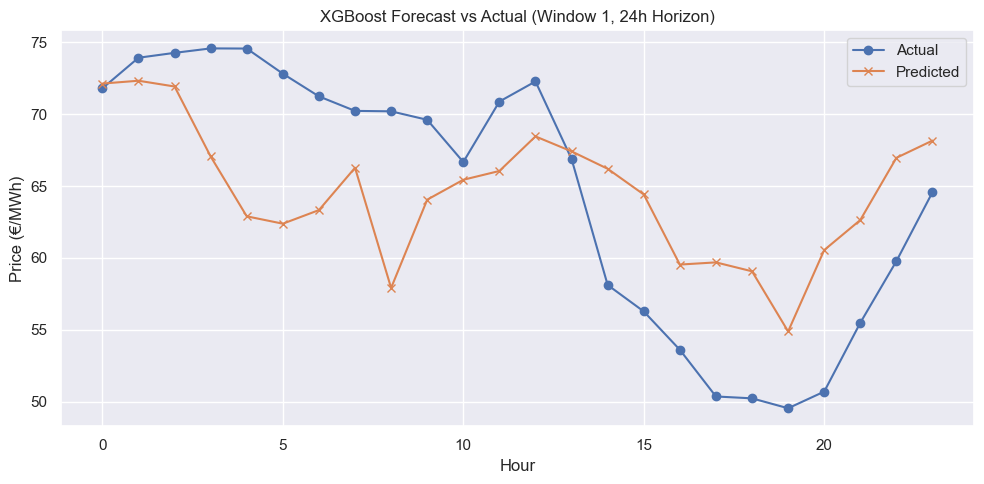

🔍 Window 1 example:
   Actual: 71.80 €/MWh | Predicted: 72.13 €/MWh
   Actual: 73.93 €/MWh | Predicted: 72.33 €/MWh
   Actual: 74.27 €/MWh | Predicted: 71.93 €/MWh
   Actual: 74.58 €/MWh | Predicted: 67.06 €/MWh
   Actual: 74.57 €/MWh | Predicted: 62.89 €/MWh

📊 XGBoost — Average % Error over 5 windows: 12.74%


np.float64(12.741471414750851)

In [60]:
from xgboost import XGBRegressor

def evaluate_sliding_window_xgb(df, target_col='price actual', forecast_horizon=24, n_windows=5):
    df = df.copy()
    df['price_actual_24h_ahead'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['price_actual_24h_ahead'])

    drop_cols = ['price actual', 'price day ahead', 'price_actual_24h_ahead']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X = df[feature_cols]
    y = df['price_actual_24h_ahead']

    print(f"🧪 Running XGBoost over {n_windows} sliding windows...")

    window_size = len(df) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_test = X.iloc[test_start:test_end]
        y_test = y.iloc[test_start:test_end]

        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test.values[:5], y_pred[:5]):
                print(f"   Actual: {true:.2f} €/MWh | Predicted: {pred:.2f} €/MWh")

            # Plot actual vs predicted values for this window
            import matplotlib.pyplot as plt

            plt.figure(figsize=(10, 5))
            plt.plot(y_test.values, label="Actual", marker='o')
            plt.plot(y_pred, label="Predicted", marker='x')
            plt.title("XGBoost Forecast vs Actual (Window 1, 24h Horizon)")
            plt.xlabel("Hour")
            plt.ylabel("Price (€/MWh)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test.values[:5], y_pred[:5]):
                print(f"   Actual: {true:.2f} €/MWh | Predicted: {pred:.2f} €/MWh")

        err_pct = mean_absolute_percentage_error(y_test, y_pred) * 100
        errors.append(err_pct)

    if errors:
        avg_error_pct = np.mean(errors)
        print(f"\n📊 XGBoost — Average % Error over {len(errors)} windows: {avg_error_pct:.2f}%")
        return avg_error_pct
    else:
        print("❌ No valid windows to evaluate.")
        return None
    
evaluate_sliding_window_xgb(df)


🧪 Running LSTM over 5 sliding windows...


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
🔍 Window 1 example:
   Actual: 56.06 €/MWh | Predicted: 60.55 €/MWh
   Actual: 53.67 €/MWh | Predicted: 55.93 €/MWh
   Actual: 50.30 €/MWh | Predicted: 52.32 €/MWh
   Actual: 49.74 €/MWh | Predicted: 51.83 €/MWh
   Actual: 48.44 €/MWh | Predicted: 53.98 €/MWh


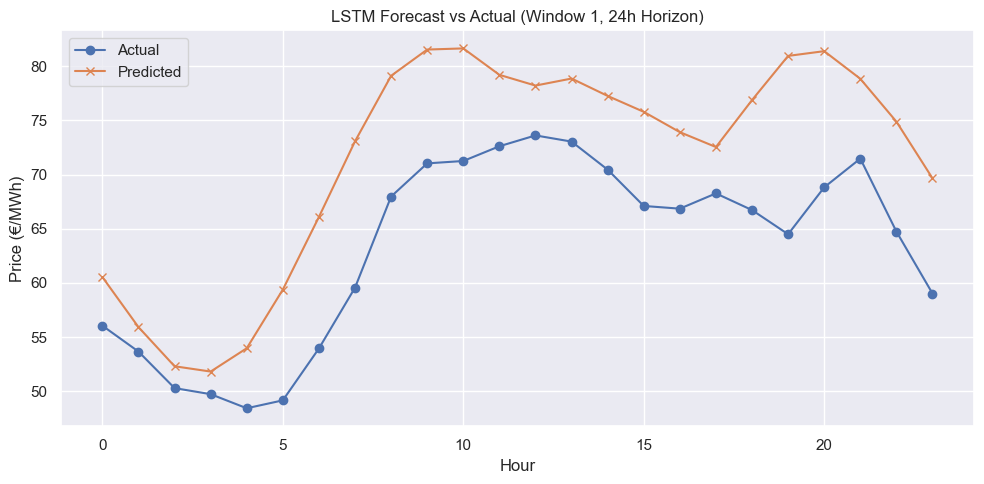

🔍 Window 1 example:
   Actual: 56.06 €/MWh | Predicted: 60.55 €/MWh
   Actual: 53.67 €/MWh | Predicted: 55.93 €/MWh
   Actual: 50.30 €/MWh | Predicted: 52.32 €/MWh
   Actual: 49.74 €/MWh | Predicted: 51.83 €/MWh
   Actual: 48.44 €/MWh | Predicted: 53.98 €/MWh


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

📊 LSTM — Average % Error over 5 windows: 12.42%


np.float64(12.417219472506815)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def evaluate_sliding_window_lstm(df, target_col='price actual', forecast_horizon=24, n_windows=5, timesteps=24):
    df = df.copy()
    df['target'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['target'])

    drop_cols = ['price actual', 'price day ahead', 'target']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X_raw = df[feature_cols].values
    y_raw = df['target'].values.reshape(-1, 1)

    # Normalize
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)

    # Build sequences
    X_seq = []
    y_seq = []
    for i in range(timesteps, len(X_scaled) - forecast_horizon):
        X_seq.append(X_scaled[i - timesteps:i])
        y_seq.append(y_scaled[i + forecast_horizon - 1])
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print(f"🧪 Running LSTM over {n_windows} sliding windows...")
    window_size = len(X_seq) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X_seq[train_start:train_end]
        y_train = y_seq[train_start:train_end]
        X_test = X_seq[test_start:test_end]
        y_test = y_seq[test_start:test_end]

        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_seq.shape[2])))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_inv = scaler_y.inverse_transform(y_pred)
        y_test_inv = scaler_y.inverse_transform(y_test)

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test_inv[:5], y_pred_inv[:5]):
                print(f"   Actual: {true[0]:.2f} €/MWh | Predicted: {pred[0]:.2f} €/MWh")

            # Plot actual vs predicted values for this window
            import matplotlib.pyplot as plt

            plt.figure(figsize=(10, 5))
            plt.plot(y_test_inv, label="Actual", marker='o')
            plt.plot(y_pred_inv, label="Predicted", marker='x')
            plt.title("LSTM Forecast vs Actual (Window 1, 24h Horizon)")
            plt.xlabel("Hour")
            plt.ylabel("Price (€/MWh)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test_inv[:5], y_pred_inv[:5]):
                print(f"   Actual: {true[0]:.2f} €/MWh | Predicted: {pred[0]:.2f} €/MWh")

        err_pct = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
        errors.append(err_pct)

    if errors:
        avg_error_pct = np.mean(errors)
        print(f"\n📊 LSTM — Average % Error over {len(errors)} windows: {avg_error_pct:.2f}%")
        return avg_error_pct
    else:
        print("❌ No valid windows to evaluate.")
        return None
    
evaluate_sliding_window_lstm(df)


In [62]:
import numpy as np

def add_lag_and_time_features(df, target_col='price actual'):
    df = df.copy()

    # ✅ Lag Features
    df['lag_1h'] = df[target_col].shift(1)
    df['lag_24h'] = df[target_col].shift(24)

    # ✅ Time-based Features
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek

    # ✅ Cyclical Encoding
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    return df

df_features = add_lag_and_time_features(df)
df_features.dropna(inplace=True)

🧪 Running LSTM (optimized features) over 5 sliding windows...


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
🔍 Window 1 example:
   Actual: 68.83 €/MWh | Predicted: 66.24 €/MWh
   Actual: 71.48 €/MWh | Predicted: 64.83 €/MWh
   Actual: 64.75 €/MWh | Predicted: 60.25 €/MWh
   Actual: 59.03 €/MWh | Predicted: 55.86 €/MWh
   Actual: 58.70 €/MWh | Predicted: 48.11 €/MWh


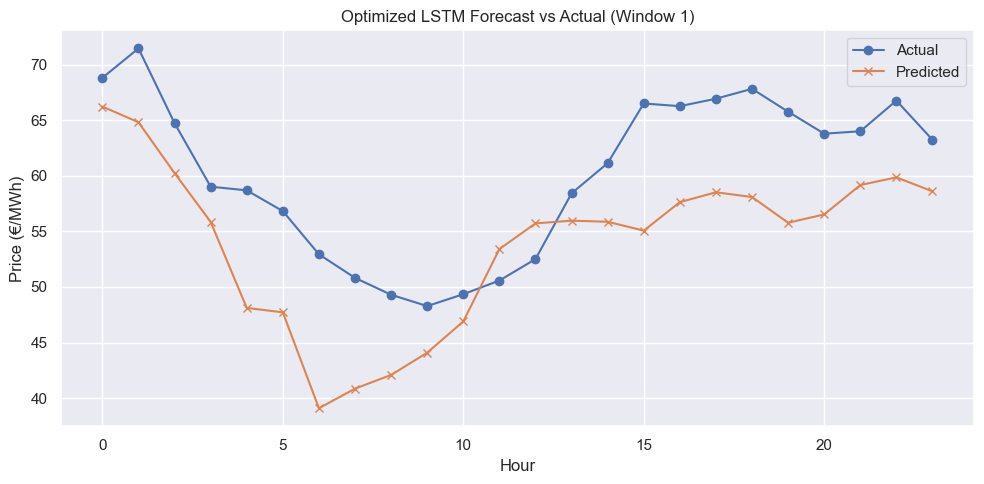

C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

📊 Optimized LSTM — Average % Error over 5 windows: 14.89%


np.float64(14.890030870420386)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def evaluate_lstm_with_optimized_features(df, target_col='price actual', forecast_horizon=24, n_windows=5, timesteps=24):
    df = df.copy()
    df['target'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['target'])

    # Drop future target and irrelevant columns
    drop_cols = ['price actual', 'price day ahead', 'target']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X_raw = df[feature_cols].values
    y_raw = df['target'].values.reshape(-1, 1)

    # Normalize
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)

    # Build sequences
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X_scaled) - forecast_horizon):
        X_seq.append(X_scaled[i - timesteps:i])
        y_seq.append(y_scaled[i + forecast_horizon - 1])
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print(f"🧪 Running LSTM (optimized features) over {n_windows} sliding windows...")
    window_size = len(X_seq) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train, y_train = X_seq[train_start:train_end], y_seq[train_start:train_end]
        X_test, y_test = X_seq[test_start:test_end], y_seq[test_start:test_end]

        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_seq.shape[2])))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_inv = scaler_y.inverse_transform(y_pred)
        y_test_inv = scaler_y.inverse_transform(y_test)

        if i == 0:
            print(f"🔍 Window {i+1} example:")
            for true, pred in zip(y_test_inv[:5], y_pred_inv[:5]):
                print(f"   Actual: {true[0]:.2f} €/MWh | Predicted: {pred[0]:.2f} €/MWh")

            # Optional: line plot
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 5))
            plt.plot(y_test_inv, label="Actual", marker='o')
            plt.plot(y_pred_inv, label="Predicted", marker='x')
            plt.title("Optimized LSTM Forecast vs Actual (Window 1)")
            plt.xlabel("Hour")
            plt.ylabel("Price (€/MWh)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        err_pct = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
        errors.append(err_pct)

    if errors:
        avg_error_pct = np.mean(errors)
        print(f"\n📊 Optimized LSTM — Average % Error over {len(errors)} windows: {avg_error_pct:.2f}%")
        return avg_error_pct
    else:
        print("❌ No valid windows to evaluate.")
        return None

# Run this function using df_features
evaluate_lstm_with_optimized_features(df_features)


In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Prepare data
df_features['target'] = df_features['price actual'].shift(-24)
df_features.dropna(subset=['target'], inplace=True)

drop_cols = ['price actual', 'price day ahead', 'target']
feature_cols = [col for col in df_features.columns if col not in drop_cols]
X_raw = df_features[feature_cols].values
y_raw = df_features['target'].values.reshape(-1, 1)

# Step 2: Fit scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

# Step 3: Build sequences for LSTM
timesteps = 24
X_seq, y_seq = [], []
for i in range(timesteps, len(X_scaled) - 24):
    X_seq.append(X_scaled[i - timesteps:i])
    y_seq.append(y_scaled[i + 24 - 1])
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Step 4: Train LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_seq.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_seq, y_seq, epochs=10, batch_size=32, verbose=0)

# Step 5: Recursive Forecast for 24 hours
latest_sequence = df_features[feature_cols].iloc[-24:].copy()
predictions_scaled = []

for step in range(24):
    input_scaled = scaler_X.transform(latest_sequence.values)
    input_seq = input_scaled.reshape((1, 24, input_scaled.shape[1]))

    pred_scaled = model.predict(input_seq)
    predictions_scaled.append(pred_scaled[0][0])
    pred_inv = scaler_y.inverse_transform(pred_scaled)[0][0]

    next_input = latest_sequence.iloc[1:].copy()
    next_row = latest_sequence.iloc[-1:].copy()
    next_row['lag_1h'] = pred_inv
    next_row['lag_24h'] = latest_sequence.iloc[-24]['lag_1h'] if 'lag_1h' in latest_sequence.columns else np.nan
    next_row['hour'] = (next_row['hour'] + 1) % 24
    next_row['hour_sin'] = np.sin(2 * np.pi * next_row['hour'] / 24)
    next_row['hour_cos'] = np.cos(2 * np.pi * next_row['hour'] / 24)
    next_row['day_of_week'] = (next_row['day_of_week'] + (next_row['hour'] == 0).astype(int)) % 7
    next_row['dow_sin'] = np.sin(2 * np.pi * next_row['day_of_week'] / 7)
    next_row['dow_cos'] = np.cos(2 * np.pi * next_row['day_of_week'] / 7)

    latest_sequence = pd.concat([next_input, next_row])

# Step 6: Inverse transform and print results
predictions_scaled = np.array(predictions_scaled).reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

for i, price in enumerate(predictions, 1):
    print(f"Hour +{i}: {price:.2f} €/MWh")


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Hour +1: 72.56 €/MWh
Hour +2: 71.28 €/MWh
Hour +3: 68.04 €/MWh
Hour +4: 63.02 €/MWh
Hou

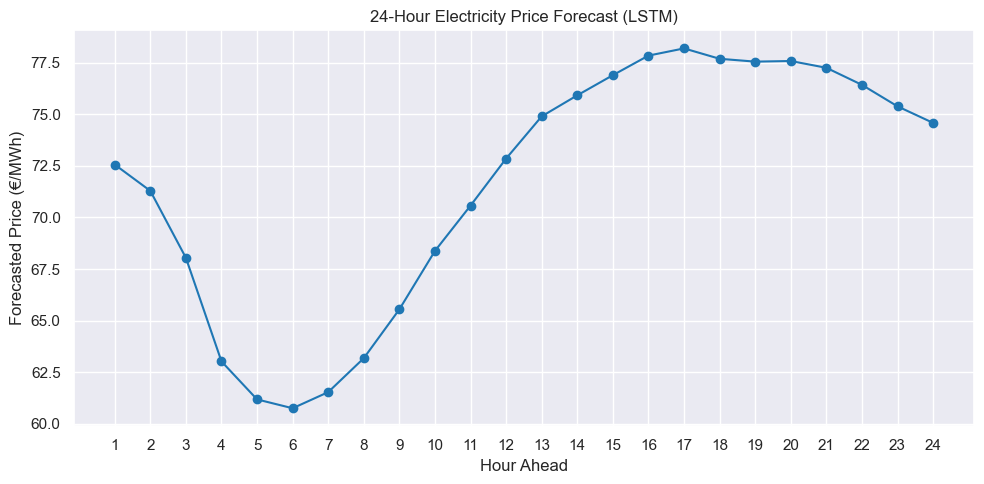

In [65]:
# List of hour labels (1 to 24)
hours = list(range(1, 25))

# Plot the predicted values
plt.figure(figsize=(10, 5))
plt.plot(hours, predictions, marker='o', linestyle='-', color='tab:blue')
plt.title("24-Hour Electricity Price Forecast (LSTM)")
plt.xlabel("Hour Ahead")
plt.ylabel("Forecasted Price (€/MWh)")
plt.xticks(hours)
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

def evaluate_model_long_term(df, model_type='lr', target_col='price actual', forecast_horizon=168, n_windows=5):
    df = df.copy()
    df['target'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['target'])

    drop_cols = ['price actual', 'price day ahead', 'target']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X = df[feature_cols]
    y = df['target']

    print(f"🧪 Running {model_type.upper()} for long-term (7-day) forecast across {n_windows} sliding windows...")

    window_size = len(df) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        X_test = X.iloc[test_start:test_end]
        y_test = y.iloc[test_start:test_end]

        if model_type == 'lr':
            model = LinearRegression()
        elif model_type == 'rf':
            model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1)  # fixed n_jobs
        elif model_type == 'xgb':
            model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=1)
        else:
            raise ValueError("Unsupported model type. Choose from 'lr', 'rf', 'xgb'.")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        err_pct = mean_absolute_percentage_error(y_test, y_pred) * 100
        errors.append(err_pct)

    avg_error_pct = np.mean(errors)
    print(f"📊 {model_type.upper()} — Average % Error over {n_windows} windows (7-day horizon): {avg_error_pct:.2f}%")
    return avg_error_pct

# Run evaluation for all 3 models
lr_error = evaluate_model_long_term(df_features, model_type='lr')
rf_error = evaluate_model_long_term(df_features, model_type='rf')
xgb_error = evaluate_model_long_term(df_features, model_type='xgb')


🧪 Running LR for long-term (7-day) forecast across 5 sliding windows...
📊 LR — Average % Error over 5 windows (7-day horizon): 15.33%
🧪 Running RF for long-term (7-day) forecast across 5 sliding windows...
📊 RF — Average % Error over 5 windows (7-day horizon): 15.50%
🧪 Running XGB for long-term (7-day) forecast across 5 sliding windows...
📊 XGB — Average % Error over 5 windows (7-day horizon): 15.11%


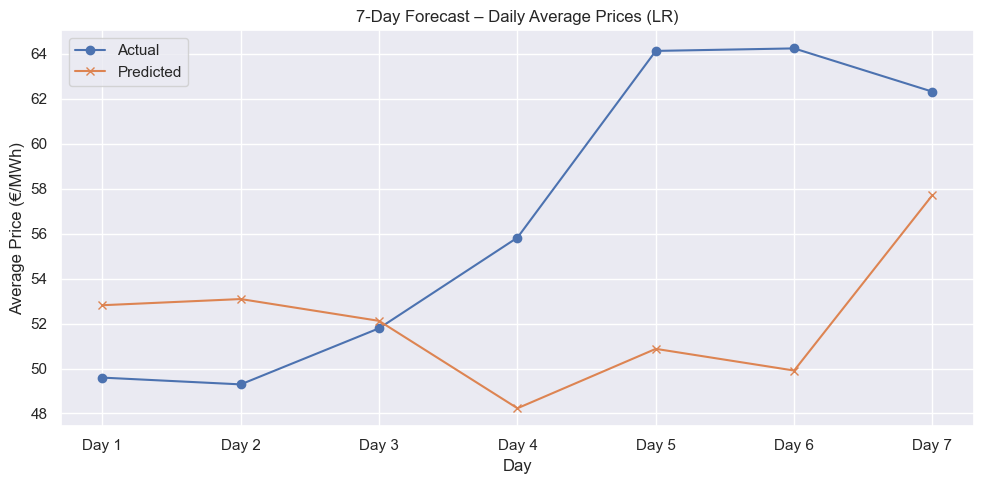

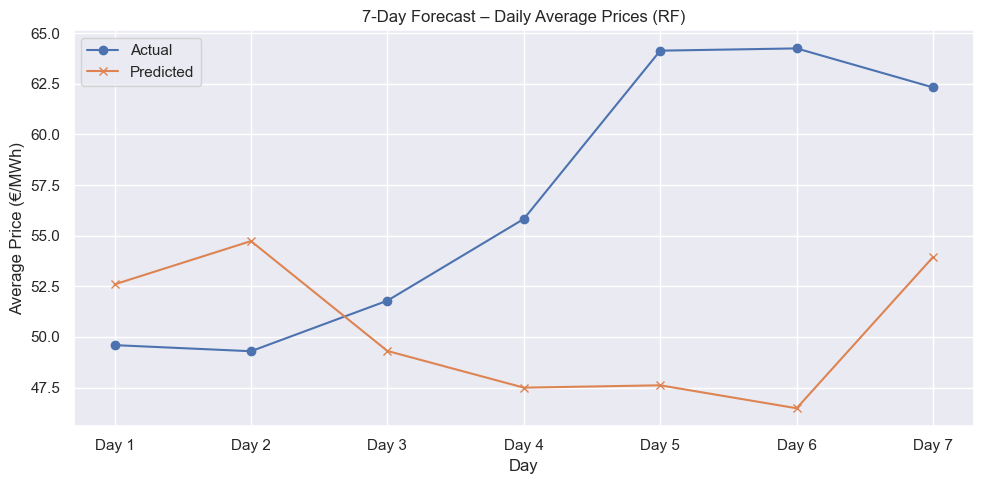

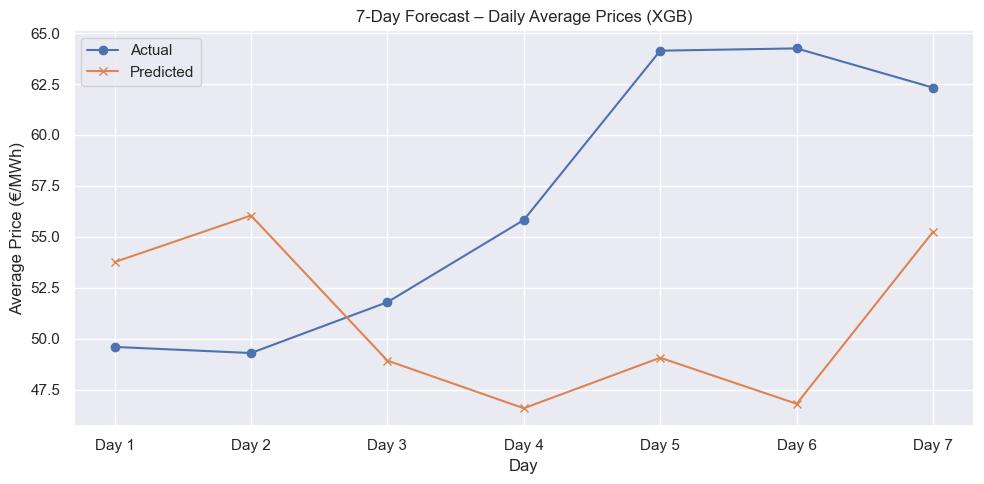

In [67]:
def plot_daily_avg_forecast(df, model_type='xgb', target_col='price actual', forecast_horizon=168):
    df = df.copy()
    df['target'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['target'])

    drop_cols = ['price actual', 'price day ahead', 'target']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X = df[feature_cols]
    y = df['target']

    # Try window 5, or step back if not enough test data
    for window_index in reversed(range(6)):
        window_size = len(df) // 6
        train_start = window_index * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        if test_end <= len(df):
            break
    else:
        raise ValueError("Not enough data for a full 7-day test window.")

    X_train = X.iloc[train_start:train_end]
    y_train = y.iloc[train_start:train_end]
    X_test = X.iloc[test_start:test_end]
    y_test = y.iloc[test_start:test_end]

    # Train model
    if model_type == 'lr':
        model = LinearRegression()
    elif model_type == 'rf':
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1)
    elif model_type == 'xgb':
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=1)
    else:
        raise ValueError("Unsupported model type.")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute daily averages (24h chunks)
    y_actual_avg = [np.mean(y_test[i*24:(i+1)*24]) for i in range(7)]
    y_pred_avg = [np.mean(y_pred[i*24:(i+1)*24]) for i in range(7)]

    days = [f'Day {i+1}' for i in range(7)]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(days, y_actual_avg, marker='o', label='Actual')
    plt.plot(days, y_pred_avg, marker='x', label='Predicted')
    plt.title(f"7-Day Forecast – Daily Average Prices ({model_type.upper()})")
    plt.xlabel("Day")
    plt.ylabel("Average Price (€/MWh)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_daily_avg_forecast(df_features, model_type='lr')
plot_daily_avg_forecast(df_features, model_type='rf')
plot_daily_avg_forecast(df_features, model_type='xgb')



In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def evaluate_lstm_long_term(df, target_col='price actual', forecast_horizon=168, n_windows=5, timesteps=24):
    df = df.copy()
    df['target'] = df[target_col].shift(-forecast_horizon)
    df = df.dropna(subset=['target'])

    drop_cols = ['price actual', 'price day ahead', 'target']
    feature_cols = [col for col in df.columns if col not in drop_cols]
    X_raw = df[feature_cols].values
    y_raw = df['target'].values.reshape(-1, 1)

    # Scale
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)

    # Build sequences
    X_seq, y_seq = [], []
    for i in range(timesteps, len(X_scaled) - forecast_horizon):
        X_seq.append(X_scaled[i - timesteps:i])
        y_seq.append(y_scaled[i + forecast_horizon - 1])
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print(f"🧪 Running LSTM for long-term (7-day) forecast across {n_windows} sliding windows...")
    window_size = len(X_seq) // (n_windows + 1)
    errors = []

    for i in range(n_windows):
        train_start = i * window_size
        train_end = train_start + window_size
        test_start = train_end
        test_end = test_start + forecast_horizon

        X_train = X_seq[train_start:train_end]
        y_train = y_seq[train_start:train_end]
        X_test = X_seq[test_start:test_end]
        y_test = y_seq[test_start:test_end]

        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(timesteps, X_seq.shape[2])))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_inv = scaler_y.inverse_transform(y_pred)
        y_test_inv = scaler_y.inverse_transform(y_test)

        err_pct = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
        errors.append(err_pct)

    avg_error_pct = np.mean(errors)
    print(f"📊 LSTM — Average % Error over {n_windows} windows (7-day horizon): {avg_error_pct:.2f}%")
    return avg_error_pct

# Run the function
lstm_error = evaluate_lstm_long_term(df_features)


🧪 Running LSTM for long-term (7-day) forecast across 5 sliding windows...


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\gpere\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
📊 LSTM — Average % Error over 5 windows (7-day horizon): 19.12%


In [69]:
# Optimized version of rolling feature addition
def add_rolling_features(df, window=24):
    df = df.copy()

    df['price_rolling_24h'] = df['price actual'].rolling(window=window).mean()

    if 'total load actual' in df.columns:
        df['load_rolling_24h'] = df['total load actual'].rolling(window=window).mean()

    # Drop only rows with NaNs from the new columns
    df = df.dropna(subset=['price_rolling_24h', 'load_rolling_24h'] if 'load_rolling_24h' in df.columns else ['price_rolling_24h'])

    return df

# Apply and test
df_features_enhanced = add_rolling_features(df_features)
xgb_optimized_error = evaluate_model_long_term(df_features_enhanced, model_type='xgb')


🧪 Running XGB for long-term (7-day) forecast across 5 sliding windows...
📊 XGB — Average % Error over 5 windows (7-day horizon): 15.81%


In [70]:
def add_delta_features(df):
    df = df.copy()

    # Price delta features
    df['price_delta_1h'] = df['price actual'] - df['price actual'].shift(1)
    df['price_delta_24h'] = df['price actual'] - df['price actual'].shift(24)

    # Optional: Load delta feature
    if 'total load actual' in df.columns:
        df['load_delta_1h'] = df['total load actual'] - df['total load actual'].shift(1)

    # Drop rows with NaNs caused by shifting
    df.dropna(inplace=True)

    return df

# Apply it
df_features_with_deltas = add_delta_features(df_features)

# Now re-evaluate XGBoost model with new features
xgb_deltas_error = evaluate_model_long_term(df_features_with_deltas, model_type='xgb')


🧪 Running XGB for long-term (7-day) forecast across 5 sliding windows...
📊 XGB — Average % Error over 5 windows (7-day horizon): 16.14%


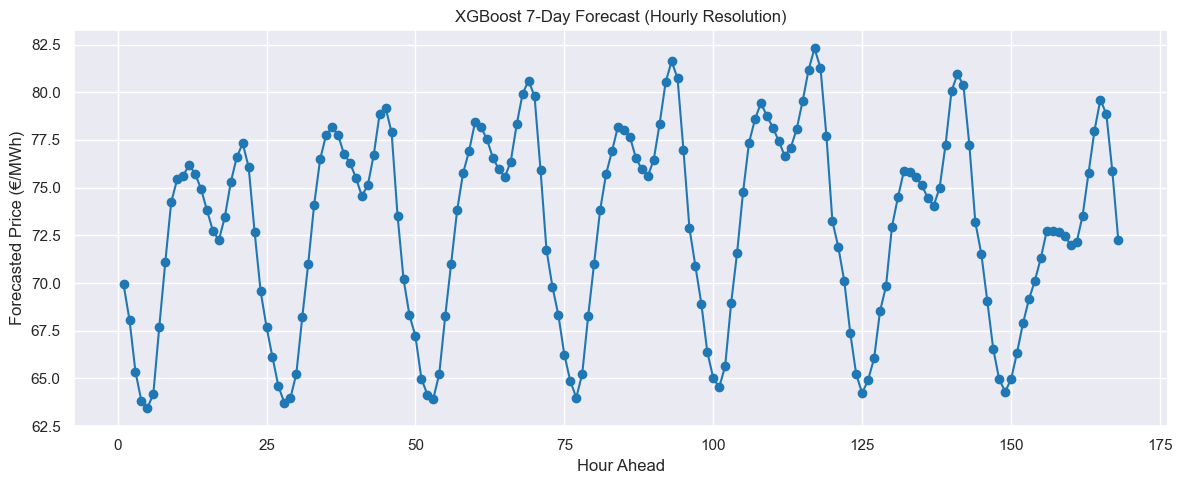

In [71]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Prepare latest data and scalers
drop_cols = ['price actual', 'price day ahead']
feature_cols = [col for col in df_features.columns if col not in drop_cols]

df_clean = df_features.dropna(subset=feature_cols + ['price actual']).copy()
X_raw = df_clean[feature_cols].values
y_raw = df_clean['price actual'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

# Train the final XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_scaled, y_scaled.ravel())

# Recursive forecast: 168 hours ahead
latest_df = df_features[feature_cols].iloc[-24:].copy()
predictions_scaled = []

for step in range(168):
    X_input = scaler_X.transform(latest_df.values)
    pred_scaled = model.predict(X_input[-1:].reshape(1, -1))
    predictions_scaled.append(pred_scaled[0])

    # Simulate next input step
    next_row = latest_df.iloc[-1:].copy()
    next_row['lag_1h'] = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1))[0][0]
    next_row['lag_24h'] = latest_df.iloc[-24]['lag_1h'] if 'lag_1h' in latest_df.columns else np.nan

    if 'hour' in next_row.columns:
        next_row['hour'] = (next_row['hour'] + 1) % 24
        next_row['hour_sin'] = np.sin(2 * np.pi * next_row['hour'] / 24)
        next_row['hour_cos'] = np.cos(2 * np.pi * next_row['hour'] / 24)
    if 'day_of_week' in next_row.columns:
        next_row['day_of_week'] = (next_row['day_of_week'] + (next_row['hour'] == 0).astype(int)) % 7
        next_row['dow_sin'] = np.sin(2 * np.pi * next_row['day_of_week'] / 7)
        next_row['dow_cos'] = np.cos(2 * np.pi * next_row['day_of_week'] / 7)

    latest_df = pd.concat([latest_df.iloc[1:], next_row])

# Inverse-transform and plot
predictions_scaled = np.array(predictions_scaled).reshape(-1, 1)
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(range(1, 169), predictions, marker='o', color='tab:blue')
plt.title("XGBoost 7-Day Forecast (Hourly Resolution)")
plt.xlabel("Hour Ahead")
plt.ylabel("Forecasted Price (€/MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()
